# Exercises: Plotting

### Exercise 1: Installing a package: `Primes`

Load the `Primes` packages (source code at https://github.com/JuliaMath/Primes.jl). 

Verify that you can now use the function `primes` to grab all the primes under `100`. If unsure, maybe `?primes` will help you?

In [1]:
using Pkg
Pkg.add("Primes")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Primes ─ v0.5.0
    Updating `~/src/julia-introduction/Project.toml`
  [27ebfcd6] + Primes v0.5.0
    Updating `~/src/julia-introduction/Manifest.toml`
  [27ebfcd6] + Primes v0.5.0
Precompiling project...
  ✓ Primes
  1 dependency successfully precompiled in 2 seconds (150 already precompiled)


In [2]:
using Primes
primes(0,100)

25-element Vector{Int64}:
  2
  3
  5
  7
 11
 13
 17
 19
 23
 29
 31
 37
 41
 43
 47
 53
 59
 61
 67
 71
 73
 79
 83
 89
 97

### Exercise 2: C

Use the C `cos` function to find the cos π.

In [3]:
t = ccall(:cos, Float64, (Float64,), π)

-1.0

### Exercise 3: Python

Use the Python `math.cos` function to find the cos π.

In [6]:
using PyCall
@pyimport math as pymath
pymath.cos(π)

-1.0

### Exercise 4: Simple plots

Given `x = -10:10` plot y vs. x for 
$
y=x^2
$

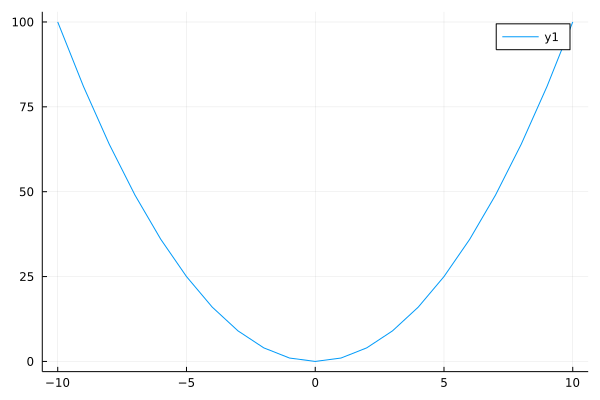

In [5]:
using Plots

x = -10:10
y = x.^2
plot(x, y)

### Exercise 5: Mount Bruno

Let's visualize Mount Bruno! 

Read the 2D topological data of Mount Bruno from the file `../data/bruno.csv`. Next we need some plotting engine for `Plots`, I recommend `Plotly`/`PlotlyJS` for this task. As a final touch, see what `surface()` function can do with your array.

In [7]:
using Plots
gr()

Plots.GRBackend()

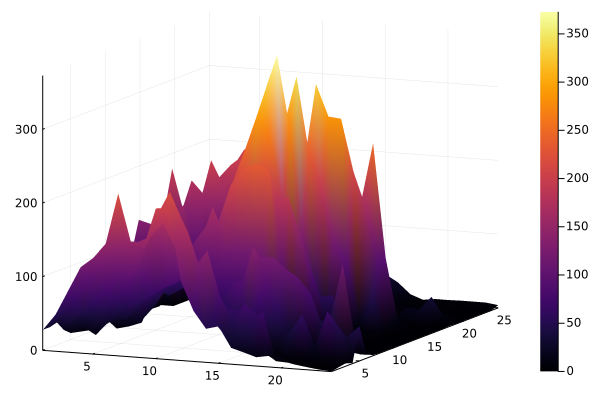

In [8]:
using DelimitedFiles

topological_data = readdlm("../data/bruno.csv", ',')
surface(topological_data)

## Exercise 6: Animating the simulation

Create an animation of our epidemic simulation. Fill in the skeleton code below with the plotting functions.

In [1]:
# The following two lines load the epidemic functions from a file
include("../epidemic.jl")

count_deaths

┌ Info: Saved animation to 
│   fn = /u/24/rantahj1/unix/src/julia-introduction/solutions/pandemic.gif
└ @ Plots /u/24/rantahj1/unix/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/u/24/rantahj1/unix/src/julia-introduction/solutions/pandemic.gif")
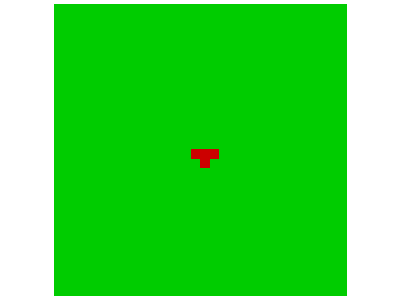

In [29]:
using Plots
gr()

# Set the size of the animation window
default(size = (400, 300))

# The map of cells
plants = make_plants(32,32)

# Build the animation frames by running simulation steps and generating a plot   
function animation()
    anim = Animation()
    
    "Build the animation frames by running simulation steps and generating a plot"
    for i ∈ 1:20
        update!(plants, 5, 0.02, 0.2)
        p = plot!(to_colors.(plants),legend=false, border=:none)
        frame(anim, p)
    end
    return anim
end

anim = animation()
gif(anim, "pandemic.gif", fps = 5)